In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sqlalchemy import create_engine
from ds100_utils import fetch_and_cache

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)

## SQL Joins

In [66]:
import sqlite3
conn = sqlite3.connect('test.db')

In [112]:
conn.executescript("""
DROP TABLE IF EXISTS users;
DROP TABLE IF EXISTS orders;

CREATE TABLE users(
    id INTEGER PRIMARY KEY, 
    name TEXT
);

INSERT INTO users VALUES 
    (1, 'sam'),
    (2, 'manana'),
    (3, 'leo'),
    (4, 'steph');

CREATE TABLE orders(
    item TEXT PRIMARY KEY,
    price NUMERIC,
    name TEXT
);

INSERT INTO orders VALUES 
    ('water', 2, 'caleb'),
    ('tea', 10.5, 'sam'),
    ('latte', 4, 'manana'),
    ('boba', 4.5, 'leo');
""");

In [113]:
def print_sql(s):
    first, *rest = s.strip().split('\n')
    print(f'sql> {first}')
    for line in rest:
        print(f'...> {line}')
    for result in conn.execute(s):
        print(result)

print_sql('SELECT * FROM users;')
print_sql('SELECT * FROM orders;')

sql> SELECT * FROM users;
(1, 'sam')
(2, 'manana')
(3, 'leo')
(4, 'steph')
sql> SELECT * FROM orders;
('water', 2, 'caleb')
('tea', 10.5, 'sam')
('latte', 4, 'manana')
('boba', 4.5, 'leo')


## IMDB Data

In [9]:
# From https://www.imdb.com/interfaces/
fetch_and_cache('https://datasets.imdbws.com/title.basics.tsv.gz', 'titles.tsv.gz')
fetch_and_cache('https://datasets.imdbws.com/name.basics.tsv.gz', 'names.tsv.gz')
!gunzip -kf data/titles.tsv.gz
!gunzip -kf data/names.tsv.gz
!ls -lh data

Using cached version that was downloaded (UTC): Fri Jul  5 12:10:57 2019
Using cached version that was downloaded (UTC): Fri Jul  5 12:11:07 2019
total 2712400
-rw-r--r--  1 sam  staff   539M Jul  5 12:11 names.tsv
-rw-r--r--  1 sam  staff   176M Jul  5 12:11 names.tsv.gz
-rw-r--r--  1 sam  staff   484M Jul  5 12:10 titles.tsv
-rw-r--r--  1 sam  staff   102M Jul  5 12:10 titles.tsv.gz


In [13]:
# How to crash your kernel:
# pd.read_csv('data/names.tsv', sep='\t')

In [14]:
# Instead, use sqlite3 (must be run from the terminal)
"""
$ sqlite3 imdb.db
sqlite> .mode tabs
sqlite> .import data/titles.tsv titles
sqlite> .import data/names.tsv names
""";

In [123]:
conn = sqlite3.connect('imdb.db')
print_sql('SELECT * FROM titles LIMIT 10;')

sql> SELECT * FROM titles LIMIT 10;
('tt0000001', 'short', 'Carmencita', 'Carmencita', '0', '1894', '\\N', '1', 'Documentary,Short')
('tt0000002', 'short', 'Le clown et ses chiens', 'Le clown et ses chiens', '0', '1892', '\\N', '5', 'Animation,Short')
('tt0000003', 'short', 'Pauvre Pierrot', 'Pauvre Pierrot', '0', '1892', '\\N', '4', 'Animation,Comedy,Romance')
('tt0000004', 'short', 'Un bon bock', 'Un bon bock', '0', '1892', '\\N', '\\N', 'Animation,Short')
('tt0000005', 'short', 'Blacksmith Scene', 'Blacksmith Scene', '0', '1893', '\\N', '1', 'Comedy,Short')
('tt0000006', 'short', 'Chinese Opium Den', 'Chinese Opium Den', '0', '1894', '\\N', '1', 'Short')
('tt0000007', 'short', 'Corbett and Courtney Before the Kinetograph', 'Corbett and Courtney Before the Kinetograph', '0', '1894', '\\N', '1', 'Short,Sport')
('tt0000008', 'short', 'Edison Kinetoscopic Record of a Sneeze', 'Edison Kinetoscopic Record of a Sneeze', '0', '1894', '\\N', '1', 'Documentary,Short')
('tt0000009', 'movie', '

In [124]:
for exp in conn.execute('SELECT sql FROM sqlite_master;'):
    print(exp[0])

CREATE TABLE titles(
  "tconst" TEXT,
  "titleType" TEXT,
  "primaryTitle" TEXT,
  "originalTitle" TEXT,
  "isAdult" TEXT,
  "startYear" TEXT,
  "endYear" TEXT,
  "runtimeMinutes" TEXT,
  "genres" TEXT
)
CREATE TABLE names(
  "nconst" TEXT,
  "primaryName" TEXT,
  "birthYear" TEXT,
  "deathYear" TEXT,
  "primaryProfession" TEXT,
  "knownForTitles" TEXT
)
CREATE TABLE "action"(
  id TEXT,
  title TEXT,
  time INT,
  year INT
)
CREATE TABLE action_ppl(
  name TEXT,
  profession,
  born INT,
  title TEXT,
  year INT
)


In [ ]:
key = 'tconst'
title = 'primaryTitle'
time = 'runtimeMinutes'
year = 'startYear'
adult = 'isAdult'
kind = 'titleType'

select_action = f'''
...
'''

create_action_table = f'''
...
'''

...

We can check to see whether this table is small enough to read into pandas:

## Sampling in SQL

In [ ]:
three_years = '''
...
'''

cluster_sample = f'''
...
'''

pd.read_sql(f'''
...
''', conn)

## Ages of Fame

In [51]:
pd.read_sql('SELECT * FROM names LIMIT 10;', conn)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0054452,tt0057345,tt0059956"
...,...,...,...,...,...,...
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0078788,tt0070849,tt0047296,tt0068646"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,soundtrack","tt0087803,tt0057877,tt0061184,tt0059749"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0031867,tt0035575,tt0055256,tt0029870"


What is this SQL query doing?

In [132]:
name = 'primaryName'
known = 'knownForTitles'
profession = 'primaryProfession'
born = 'birthYear'

select_actors = f'''
SELECT {name} AS name, 
  CAST({born} AS int) AS born,
  SUBSTR({known}, 0, INSTR({known}, ',')) AS movie_id,
  CASE WHEN {profession} LIKE '%actor%' THEN 'actor' 
    WHEN {profession} LIKE '%actress%' THEN 'actress'   
    END AS profession
FROM names
WHERE {profession} LIKE '%act%' AND
  born > 1800
'''

pd.read_sql(f'{select_actors} LIMIT 10', conn)

,name,born,movie_id,profession
0,Fred Astaire,1899,tt0043044,actor
1,Lauren Bacall,1924,tt0038355,actress
2,Brigitte Bardot,1934,tt0049189,actress
...,...,...,...,...
7,Marlon Brando,1924,tt0078788,actor
8,Richard Burton,1925,tt0087803,actor
9,James Cagney,1899,tt0031867,actor


In [ ]:
select = f'''
...
'''

conn.executescript(f'''
DROP TABLE IF EXISTS action_ppl;
CREATE TABLE action_ppl AS {select};
''')

pd.read_sql('SELECT * FROM action_ppl LIMIT 10', conn)

In [135]:
pd.read_sql('''
SELECT name, born, year,
  CASE WHEN born < 1980 THEN 'old' 
    WHEN born < 2000 THEN 'not too old' 
    ELSE 'young' END
    AS age
FROM action_ppl
''', conn).sample(10)

,name,born,year,age
9799,David Oliver,1898,1938,old
9513,Francesca Neri,1964,2002,old
4807,Nader Galal,1941,1988,old
...,...,...,...,...
3665,Frank Delfino,1911,1980,old
13522,Paddy Webster,1936,1969,old
1513,Derek Basco,1970,2018,old


In [136]:
df = pd.read_sql('SELECT * FROM action_ppl', conn)
df.shape

(15521, 5)

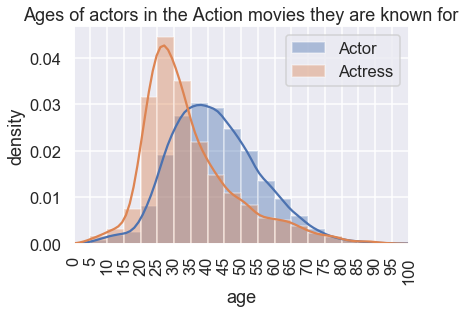

In [137]:
df['age'] = df['year'] - df['born']
bins = np.linspace(0, 100, 21)
sns.distplot(df[df['profession']=='actor']['age'], bins=bins)
sns.distplot(df[df['profession']=='actress']['age'], bins=bins)
plt.legend(labels=['Actor', 'Actress'])
plt.xticks(bins, rotation=90)
plt.xlim(0, 100)
plt.ylabel('density');
plt.title('Ages of actors in the Action movies they are known for');